# 4. Stitch outputs together
- Once you have fitted the weak, medium and dense diads, stitch them all together, and apply the Ne correction model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'1.0.2'

In [2]:
# Load in settings, paths, file extensions etc. that you saved in step 1
meta_path, spectra_path, spectra_filetype, prefix, str_prefix, spectra_file_ext, meta_file_ext, TruPower=pf.get_settings()

## Load in specra, and combine

In [3]:
import os
df2=pf.merge_fit_files(path=os.getcwd())
df2.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Diad1_Asym70,Diad1_Yuan2017_sym_factor,Diad1_Remigi2021_BSF,Diad2_Asym50,Diad2_Asym70,Diad2_Yuan2017_sym_factor,Diad2_Remigi2021_BSF,Diad1_PDF_Model,Diad2_PDF_Model,Standard
0,187-1-110-A--Spectrum--009--Spec.Data 1_CRR_Di...,104.235139,0.014270,1283.717910,0.012830,151.526101,1283.717910,450.978847,1.067749,1.876613,...,1.014574,0.071868,0.014093,1.087983,1.085627,0.142970,0.005170,PseudoVoigtModel,PseudoVoigtModel,No
1,187-1-110-A--Spectrum--010--Spec.Data 1_CRR_Di...,104.221638,0.016030,1283.733077,0.014621,136.028864,1283.733077,416.182645,1.134037,1.783855,...,1.008457,0.093780,0.016673,1.100000,1.117005,0.161306,0.005397,PseudoVoigtModel,PseudoVoigtModel,No
2,187-1-110-A--Spectrum--011--Spec.Data 1_CRR_Di...,104.147419,0.016167,1283.806667,0.014763,125.334859,1283.806667,372.675136,1.076490,1.903475,...,1.209536,0.595102,0.017178,1.079914,1.069909,0.128669,0.005904,PseudoVoigtModel,PseudoVoigtModel,No
3,187-1-111-reg1-C--Spectrum--043--Spec.Data 1_C...,103.495735,0.008924,1285.331615,0.007903,225.424996,1285.331615,427.243376,0.696466,2.185345,...,1.008562,0.046653,0.006179,1.077143,1.087912,0.084089,0.002524,PseudoVoigtModel,PseudoVoigtModel,No
4,187-1-111-reg1-C--Spectrum--044--Spec.Data 1,103.492478,0.008913,1285.325821,0.007796,225.852985,1285.325821,434.454807,0.717640,2.209629,...,1.092014,0.036974,0.006355,1.036011,1.051173,0.040809,0.002714,PseudoVoigtModel,PseudoVoigtModel,No


## First, get the metadata for this day

In [4]:
# Put the common string you can in all your Ne lines here
diad_meta=pf.get_files(path=meta_path,
file_ext=meta_file_ext, exclude_str=['Ne', 'NE', 'Si', 'nodiad', 'Ne', 'Cap','window','Video', 'nodiad','diad','Series','no_diad','diad','Series','unquant'],
 sort=True)
diad_meta[0]

'10 187-1-110-A--Spectrum--009--Information.txt'

## Now get all the important information out of the metadata files

In [5]:
# This will only work for WITEC - for other vendors, you might have to use the file datastamp. See the HORIBA example
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=diad_meta, prefix=prefix, str_prefix=str_prefix,
trupower=TruPower)
meta.head()

100%|██████████| 35/35 [00:23<00:00,  1.51it/s]

Done


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-110-A--Spectrum--009--Information.txt,"January 16, 2024\n",January,16.0,6.040,60.0,5.0,100.0,"['0h', '5m', '2s']",12:58:34 PM\n,46714.0,1325.004
1,187-1-110-A--Spectrum--010--Information.txt,"January 16, 2024\n",January,16.0,6.057,60.0,5.0,100.0,"['0h', '5m', '1s']",1:03:53 PM\n,47033.0,1325.004
2,187-1-110-A--Spectrum--011--Information.txt,"January 16, 2024\n",January,16.0,6.070,60.0,5.0,100.0,"['0h', '5m', '1s']",1:09:21 PM\n,47361.0,1325.004
3,187-1-110-B--Spectrum--014--Information.txt,"January 16, 2024\n",January,16.0,6.106,60.0,5.0,100.0,"['0h', '5m', '2s']",1:41:32 PM\n,49292.0,1325.004
4,187-1-110-B--Spectrum--015--Information.txt,"January 16, 2024\n",January,16.0,6.107,60.0,5.0,100.0,"['0h', '5m', '2s']",1:47:05 PM\n,49625.0,1325.004


## Then get a simple file name you can stitch with the spectra

In [6]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
   file_ext=meta_file_ext)
# Checks they are all unique
file_m[0]

good job, no duplicate file names


'187-1-110-A--Spectrum--009--Information'

In [7]:
for i in range(len(file_m)):
    file_m[i] = file_m[i].replace("--Information", "")
file_m

array(['187-1-110-A--Spectrum--009', '187-1-110-A--Spectrum--010',
       '187-1-110-A--Spectrum--011', '187-1-110-B--Spectrum--014',
       '187-1-110-B--Spectrum--015', '187-1-110-B--Spectrum--016',
       '187-1-110-C--Spectrum--020', '187-1-110-C--Spectrum--021',
       '187-1-110-C--Spectrum--022', '187-1-111-reg1-A--Spectrum--031',
       '187-1-111-reg1-A--Spectrum--032',
       '187-1-111-reg1-A--Spectrum--034',
       '187-1-111-reg1-A--Spectrum--036',
       '187-1-111-reg1-B--Spectrum--038',
       '187-1-111-reg1-B--Spectrum--039',
       '187-1-111-reg1-B--Spectrum--040',
       '187-1-111-reg1-C--Spectrum--043',
       '187-1-111-reg1-C--Spectrum--044',
       '187-1-111-reg1-C--Spectrum--045',
       '187-1-111-reg2-A--Spectrum--047',
       '187-1-111-reg2-A--Spectrum--048',
       '187-1-111-reg2-A--Spectrum--049',
       '187-1-111-reg2-B--Spectrum--052',
       '187-1-111-reg2-B--Spectrum--053',
       '187-1-111-reg2-B--Spectrum--054',
       '187-1-111-reg3-A--Spec

## Now get filename from spectra into same form as metadata

In [8]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    names=df2['filename'].reset_index(drop=True),
   file_ext=spectra_file_ext)

# Remove the cosmic rays, as doesnt have it in the metatdata
file_s = np.char.replace(file_s.astype(str), "_CRR_DiadFit", "")
print(file_s[0])

good job, no duplicate file names
187-1-110-A--Spectrum--009--Spec.Data 1


In [9]:
for i in range(len(file_s)):
    file_s[i] = file_s[i].replace("--Spec.Data 1", "")
file_s

array(['187-1-110-A--Spectrum--009', '187-1-110-A--Spectrum--010',
       '187-1-110-A--Spectrum--011', '187-1-111-reg1-C--Spectrum--043',
       '187-1-111-reg1-C--Spectrum--044',
       '187-1-111-reg2-B--Spectrum--052',
       '187-1-111-reg2-B--Spectrum--053',
       '187-1-111-reg2-B--Spectrum--054', '187-1-110-B--Spectrum--014',
       '187-1-110-B--Spectrum--015', '187-1-110-B--Spectrum--016',
       '187-1-110-C--Spectrum--020', '187-1-110-C--Spectrum--021',
       '187-1-110-C--Spectrum--022', '187-1-111-reg1-A--Spectrum--031',
       '187-1-111-reg1-A--Spectrum--032',
       '187-1-111-reg1-A--Spectrum--034',
       '187-1-111-reg1-A--Spectrum--036',
       '187-1-111-reg1-B--Spectrum--038',
       '187-1-111-reg1-B--Spectrum--039',
       '187-1-111-reg1-B--Spectrum--040',
       '187-1-111-reg2-A--Spectrum--047',
       '187-1-111-reg2-A--Spectrum--048',
       '187-1-111-reg2-A--Spectrum--049',
       '187-1-111-reg3-A--Spectrum--060',
       '187-1-111-reg3-A--Spectrum--0

In [10]:
# Combining them together, if the form above matches, e.g. checking one doesnt have a suffix and the other one does

meta['filename']=file_m
df2['filename']=file_s
df_combo=pd.merge(df2, meta, on='filename').reset_index(drop=True)
df_combo.head()

,filename,Splitting,Split_σ,Diad1_Combofit_Cent,Diad1_cent_err,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Residual,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,187-1-110-A--Spectrum--009,104.235139,0.014270,1283.717910,0.012830,151.526101,1283.717910,450.978847,1.067749,1.876613,...,January,16.0,6.040,60.0,5.0,100.0,"['0h', '5m', '2s']",12:58:34 PM\n,46714.0,1325.004
1,187-1-110-A--Spectrum--010,104.221638,0.016030,1283.733077,0.014621,136.028864,1283.733077,416.182645,1.134037,1.783855,...,January,16.0,6.057,60.0,5.0,100.0,"['0h', '5m', '1s']",1:03:53 PM\n,47033.0,1325.004
2,187-1-110-A--Spectrum--011,104.147419,0.016167,1283.806667,0.014763,125.334859,1283.806667,372.675136,1.076490,1.903475,...,January,16.0,6.070,60.0,5.0,100.0,"['0h', '5m', '1s']",1:09:21 PM\n,47361.0,1325.004
3,187-1-111-reg1-C--Spectrum--043,103.495735,0.008924,1285.331615,0.007903,225.424996,1285.331615,427.243376,0.696466,2.185345,...,January,16.0,6.046,60.0,5.0,50.0,"['0h', '5m', '1s']",4:03:17 PM\n,57797.0,1325.004
4,187-1-111-reg1-C--Spectrum--044,103.492478,0.008913,1285.325821,0.007796,225.852985,1285.325821,434.454807,0.717640,2.209629,...,January,16.0,6.036,60.0,5.0,50.0,"['0h', '5m', '1s']",4:17:32 PM\n,58652.0,1325.004


## If you have secondary phases, now is the time to merge those in

In [11]:
df_combo_sec_phase=pf.merge_in_carb_SO2(
df_combo=df_combo, file1_name='Carb_Peak_fits.xlsx', file2_name='SO2_Peak_fits.xlsx', 
prefix=prefix, str_prefix=str_prefix, file_ext=spectra_file_ext)
#df_combo_sec_phase.to_excel('FI_fitting_w_sec_phases.xlsx', index=False)

Made a df!
good job, no duplicate file names


## If you have SO2, now is the time to calculate the molar proportion of SO2

In [12]:
if 'Peak_Area_SO2' in df_combo_sec_phase:
    

        SO2_mol_ratio=pf.calculate_SO2_CO2_ratio(SO2_area=df_combo_sec_phase['Peak_Area_SO2'], 
        diad1_area=df_combo_sec_phase['Diad1_Voigt_Area'], diad2_area=df_combo_sec_phase['Diad2_Voigt_Area'], 
                SO2_cross_sec=5.3, diad1_cross_sec=0.89, diad2_cross_sec=1.4)
        

        df_combo_sec_phase['SO2_mol_ratio']=SO2_mol_ratio

## Now we calculate the density using the UC Berkeley Densimeter. 
- If you have your own densimeter, I am happy to add a function for it if you email me (penny_wieser@berkeley.edu)
- This particular function propagates the uncertainty on 1) The neon line correction model 2) the peak fits of the diads themselves 3) The densimeter. 

In [13]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.273280920083031e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-110-A--Spectrum--009,0.534100,0.007119,0.006717,0.002360,104.008011,0.014250,0.000562,0.014270,6.040,...,46714.0,NaN,NaN,NaN,NaN,NaN,46714.0,0.997821,0.997816,0.997826
1,187-1-110-A--Spectrum--010,0.527635,0.007882,0.007520,0.002359,103.994275,0.016005,0.000560,0.016030,6.057,...,47033.0,NaN,NaN,NaN,NaN,NaN,47033.0,0.997818,0.997813,0.997824
2,187-1-110-A--Spectrum--011,0.493001,0.007822,0.007459,0.002354,103.919946,0.016141,0.000559,0.016167,6.070,...,47361.0,NaN,NaN,NaN,NaN,NaN,47361.0,0.997816,0.997810,0.997821
3,187-1-110-B--Spectrum--014,0.516121,0.004794,0.004175,0.002357,103.969700,0.008934,0.000551,0.008937,6.106,...,49292.0,1097.127641,244.820531,24.101999,Spline,0.077924,49292.0,0.997801,0.997795,0.997806
4,187-1-110-B--Spectrum--015,0.524100,0.004828,0.004213,0.002358,103.986744,0.008981,0.000550,0.008984,6.107,...,49625.0,1097.127641,268.731685,21.773877,Spline,0.091678,49625.0,0.997798,0.997793,0.997803


In [14]:
df=pf.calculate_density_ucb(df_combo=df_combo_sec_phase,
  Ne_pickle_str='Neon_corr_model.pkl',  temp='SupCrit', CI_split=0.67, CI_neon=0.67)
df.head()

5.273280920083031e-06


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,sec since midnight,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name,Carb_Diad_Ratio,time,preferred_values,lower_values,upper_values
0,187-1-110-A--Spectrum--009,0.534100,0.007119,0.006717,0.002360,104.008011,0.014250,0.000562,0.014270,6.040,...,46714.0,NaN,NaN,NaN,NaN,NaN,46714.0,0.997821,0.997816,0.997826
1,187-1-110-A--Spectrum--010,0.527635,0.007882,0.007520,0.002359,103.994275,0.016005,0.000560,0.016030,6.057,...,47033.0,NaN,NaN,NaN,NaN,NaN,47033.0,0.997818,0.997813,0.997824
2,187-1-110-A--Spectrum--011,0.493001,0.007822,0.007459,0.002354,103.919946,0.016141,0.000559,0.016167,6.070,...,47361.0,NaN,NaN,NaN,NaN,NaN,47361.0,0.997816,0.997810,0.997821
3,187-1-110-B--Spectrum--014,0.516121,0.004794,0.004175,0.002357,103.969700,0.008934,0.000551,0.008937,6.106,...,49292.0,1097.127641,244.820531,24.101999,Spline,0.077924,49292.0,0.997801,0.997795,0.997806
4,187-1-110-B--Spectrum--015,0.524100,0.004828,0.004213,0.002358,103.986744,0.008981,0.000550,0.008984,6.107,...,49625.0,1097.127641,268.731685,21.773877,Spline,0.091678,49625.0,0.997798,0.997793,0.997803


### This cell saves the merged together dataframe with the folder name and the date you fitted it

In [15]:

from datetime import date
today = date.today()
today_str = today.strftime("%Y-%m-%d")
sorted_df = df.sort_values('sec since midnight')
date=meta['date'].iloc[0].replace('\n', '')
name='Raman_session_'+date+'_fitted_'+today_str+'.xlsx'
print(name)
sorted_df.to_excel(name)

Raman_session_January 16, 2024_fitted_2024-07-12.xlsx


## This helps visualize the errors on each spectra 

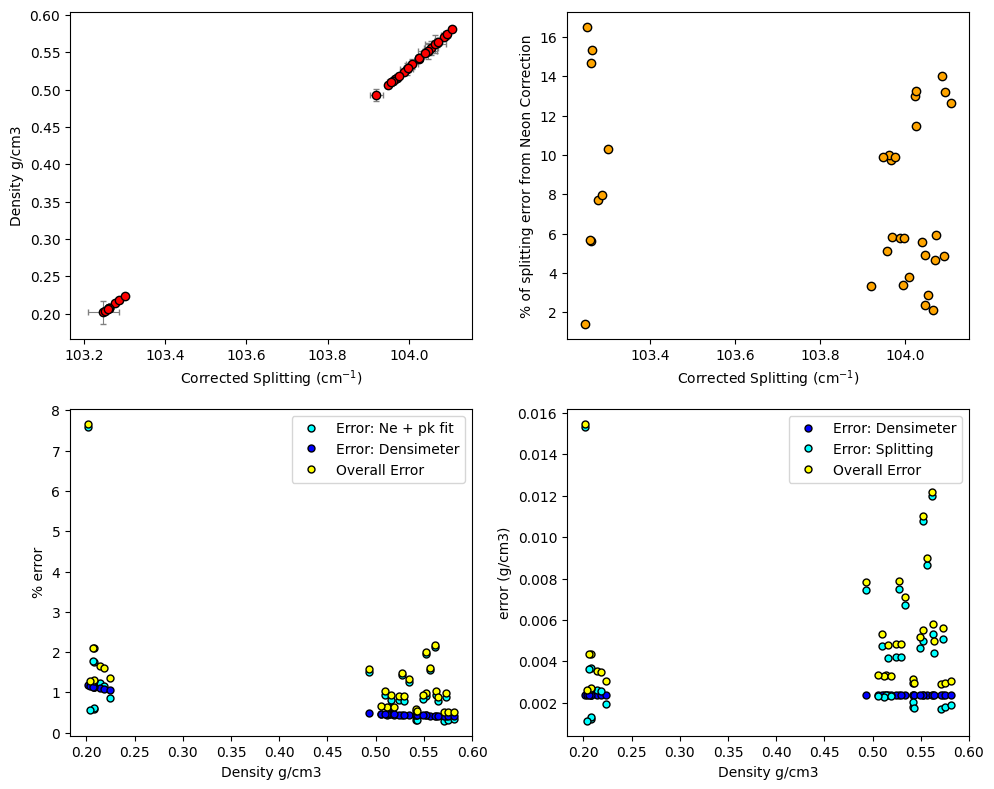

In [16]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

ax2.plot(df['Corrected_Splitting'], 
100*df['Corrected_Splitting_σ_Ne']/(df['Corrected_Splitting_σ_Ne']+df['Corrected_Splitting_σ_peak_fit']),
 'ok', mfc='orange')
ax2.set_ylabel('% of splitting error from Neon Correction')
ax2.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from Ne+peakfit)']/df['Density g/cm3'], 
'ok', mfc='cyan', ms=5, label='Error: Ne + pk fit')


ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3 (from densimeter)']/df['Density g/cm3'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')

ax3.plot(df['Density g/cm3'], 100*df['σ Density g/cm3']/df['Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax3.set_ylabel('% error')
ax3.set_xlabel('Density g/cm3')
ax3.legend()

ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from densimeter)'], 
'ok', mfc='blue', ms=5, label='Error: Densimeter')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3 (from Ne+peakfit)'], 
'ok', mfc='cyan', ms=5, label='Error: Splitting')
ax4.plot(df['Density g/cm3'], df['σ Density g/cm3'], 
'ok', mfc='yellow', ms=5, label='Overall Error')
ax4.set_ylabel('error (g/cm3)')
ax4.set_xlabel('Density g/cm3')
ax4.legend()

fig.tight_layout()

## lets look at standards


Text(0, 0.5, 'Density g/cm3')

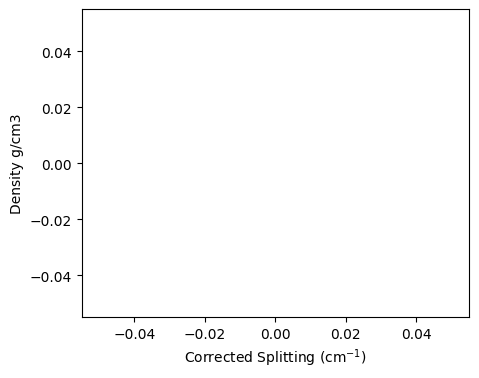

In [17]:
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df=sorted_df.loc[ sorted_df['Standard']=='Yes']
ax1.errorbar(df['Corrected_Splitting'], df['Density g/cm3'],
xerr=df['Corrected_Splitting_σ'], yerr=df['σ Density g/cm3'],
fmt='o', ecolor='grey', elinewidth=0.8, mfc='red', ms=6, mec='k', capsize=2)
ax1.set_xlabel('Corrected Splitting (cm$^{-1}$)')
ax1.set_ylabel('Density g/cm3')

In [18]:
df.to_clipboard(excel=True,index=False)

## If you were analysing fluid inclusions, lets calculate their pressures
- This bit isn't valid for melt inclusion vapour bubbles. 

Text(0, 0.5, '# of FI')

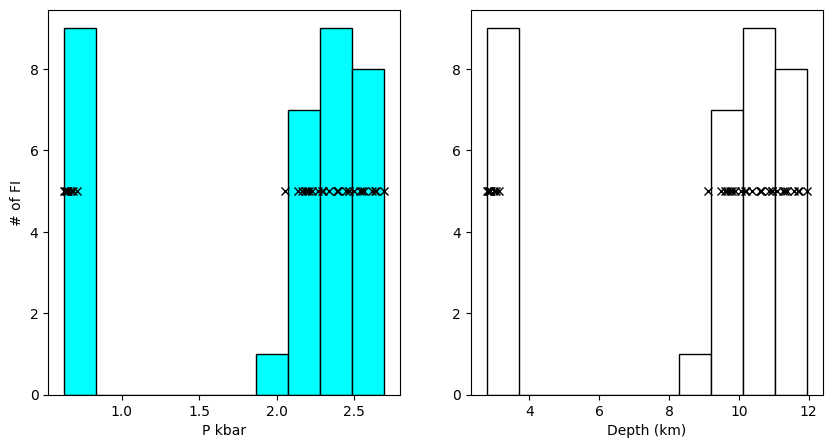

In [19]:
# Calculate pressure with a temperature estimate
Temp_C=1150
df=sorted_df.loc[(sorted_df['Density g/cm3']>0) & (sorted_df['Standard']!='Yes')]

Pressure_SW96=pf.calculate_P_for_rho_T(T_K=Temp_C+273.15,
                CO2_dens_gcm3=df['Density g/cm3'],
                 EOS='SW96')
# Calculate depth from a crustal density assumption
Depth=pf.convert_pressure_to_depth(P_kbar=Pressure_SW96['P_kbar'], 
                crust_dens_kgm3=2300)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.hist(Pressure_SW96['P_kbar'], ec='k', fc='cyan', bins=10)
ax1.plot(Pressure_SW96['P_kbar'], Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.plot(Depth, Pressure_SW96['P_kbar']*0+5, 'xk')
ax2.hist(Depth, ec='k', fc='white', bins=10)
ax1.set_xlabel('P kbar')
ax2.set_xlabel('Depth (km)')
ax1.set_ylabel('# of FI')

In [20]:
import os

if os.name=="posix":

    def mac_notification(title, subtitle, message):
        """
        Display a macOS notification with the default sound using AppleScript.
        
        Args:
        - title: Title of the notification.
        - subtitle: Subtitle of the notification.
        - message: Main message content of the notification.
        """
        os.system("""
                osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "default"'
                """.format(message, title, subtitle))

    mac_notification("Notebook Completed", "VSCode", "Step4 Stitch outputs")

else:

    # %pip install winotify

    from winotify import Notification, audio

    toast= Notification(app_id="VSCode",title="Notebook completed",
                        msg="Step4 Stitch outputs is done!",
                        duration="short")
    toast.set_audio(audio.Mail,loop=False)
    toast.show()